<a href="https://colab.research.google.com/github/crabbyabby/jax-bdsic/blob/main/autistic_mice_behavorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white",
              font_scale=1,
              rc={'axes.spines.right': False,'axes.spines.top': False}) # this last thing is equivalent to always having sns.despine()

btbr balb b6

- remove **"projsym"** because only has value moy1
- remove **"varname"** because only has value DurSTR1_nov
- remove **"sex"** because only males
- remove **"animal_projid"**, **"stocknum"**, **"z-score"**, **strain_id**

keeping strain, value, and animal_id

In [62]:
# reading all files
df_object = pd.read_csv("time-spent-in-chamber-with-empty-cage-a-novel-object.csv")
df_stranger1 = pd.read_csv("time-spent-in-chamber-with-stranger-1.csv")
df_stranger2 = pd.read_csv("time-spent-in-chamber-with-stranger-2-a-second-novel-mouse.csv")
df_friend1 = pd.read_csv("time-spent-in-chamber-with-stranger1-former-novel-mouse.csv")

df_ultimate = pd.concat([df_object, df_stranger1, df_stranger2, df_friend1], ignore_index=True)

dfs = [df_object, df_stranger1, df_stranger2, df_friend1]

mouse_strains = ['BALB/cByJ', 'BTBR T<+> Itpr3<tf>/J', 'C57BL/6J']

df_object = df_object[df_object['strain'].isin(mouse_strains)]
df_stranger1 = df_stranger1[df_stranger1['strain'].isin(mouse_strains)]
df_stranger2 = df_stranger2[df_stranger2['strain'].isin(mouse_strains)]
df_friend1 = df_friend1[df_friend1['strain'].isin(mouse_strains)]

# datasets that have only strain, animal id, value and only for the 3 strains we want
df_object = df_object[['strain', 'animal_id', 'value']]
df_stranger1 = df_stranger1[['strain', 'animal_id', 'value']]
df_stranger2 = df_stranger2[['strain', 'animal_id', 'value']]
df_friend1 = df_friend1[['strain', 'animal_id', 'value']]

dfs = [df_object, df_stranger1, df_stranger2, df_friend1]

for df in dfs:
  df.rename(columns={'value' : 'seconds'}, inplace=True)
  df['strain'] = df['strain'].str.replace('BALB/cByJ', 'BALB/c')
  df['strain'] = df['strain'].str.replace('C57BL/6J', 'B6')
  df['strain'] = df['strain'].str.replace('BTBR T<+> Itpr3<tf>/J', 'BTBR')

display(df_object)


,strain,animal_id,seconds
77,BALB/c,BA.02,136
78,BALB/c,BA.03,0
79,BALB/c,BA.04,308
80,BALB/c,BA.05,0
81,BALB/c,BA.06,0
...,...,...,...
175,B6,B6.B17,174
176,B6,B6.B18,105
177,B6,B6.B19,117
178,B6,B6.B20,137


In [77]:
# new dataframes that are by strain
# deseq if we find expression
strain_alias = {
    'BALB/c': 'balb',
    'BTBR': 'btbr',
    'B6': 'b6'
}

df_object['condition'] = 'object'
df_stranger1['condition'] = 'stranger1'
df_stranger2['condition'] = 'stranger2'
df_friend1['condition'] = 'friend1'

dfs_by_strain = {}

for strain, alias in strain_alias.items():
    dfs_by_strain[alias] = pd.concat(
        [df[df['strain'] == strain] for df in dfs],
        ignore_index=True
    )

df_balb = dfs_by_strain['balb']
df_btbr = dfs_by_strain['btbr']
df_b6 = dfs_by_strain['b6']

Text(0.5, 0, '')

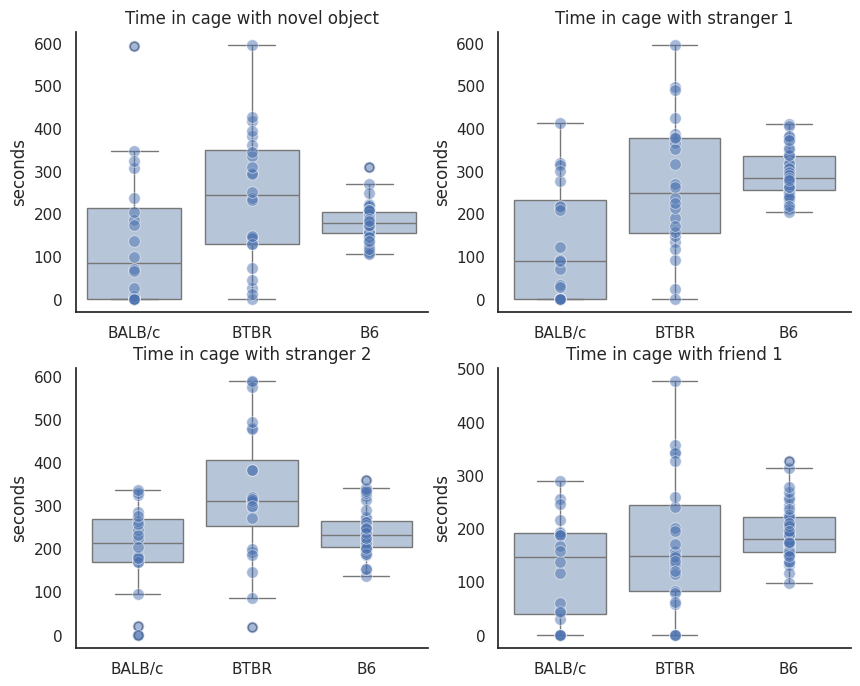

In [78]:
# Making plot for novel objects by strain
# probably fitting linear models
#coorplot correlation plot plotting phenotypes vs phenotypes
# if correlated, take first principle component
#probe to gene id
#multiple testing correction

#each row is a gene
#maybe do false discovery rate
# technique that reduces pvalue threshold, then combine dataset with the human one

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

object_strain = sns.scatterplot(x = "strain", y = "seconds", data = df_object, alpha = 0.5, s=70, ax = axs[0,0], zorder = 1, edgecolor = 'white')
sns.boxplot(x = "strain", y = "seconds", data = df_object, ax=axs[0,0], zorder = 0, color = 'lightsteelblue')
object_strain.set_title("Time in cage with novel object")

sns.boxplot(x = "strain", y = "seconds", data = df_stranger1, ax=axs[0,1], zorder = 0, color = 'lightsteelblue')
stranger1_strain = sns.scatterplot(x = "strain", y = "seconds", data = df_stranger1, alpha = 0.5, s=70, ax = axs[0,1], zorder = 1, edgecolor = 'white')
stranger1_strain.set_title("Time in cage with stranger 1")

sns.boxplot(x = "strain", y = "seconds", data = df_stranger2, ax=axs[1,0], zorder = 0, color = 'lightsteelblue')
stranger2_strain = sns.scatterplot(x = "strain", y = "seconds", data = df_stranger2, alpha = 0.5, s=70, ax = axs[1,0], zorder = 1, edgecolor = 'white')
stranger2_strain.set_title("Time in cage with stranger 2")

sns.boxplot(x = "strain", y = "seconds", data = df_friend1, ax=axs[1,1], zorder = 0, color = 'lightsteelblue')
friend1_strain = sns.scatterplot(x = "strain", y = "seconds", data = df_friend1, alpha = 0.5, s=70, ax = axs[1,1], zorder = 1, edgecolor = 'white')
friend1_strain.set_title("Time in cage with friend 1")

axs[0,0].set_xlabel("")
axs[1,0].set_xlabel("")
axs[0,1].set_xlabel("")
axs[1,1].set_xlabel("")

(0.0, 600.0)

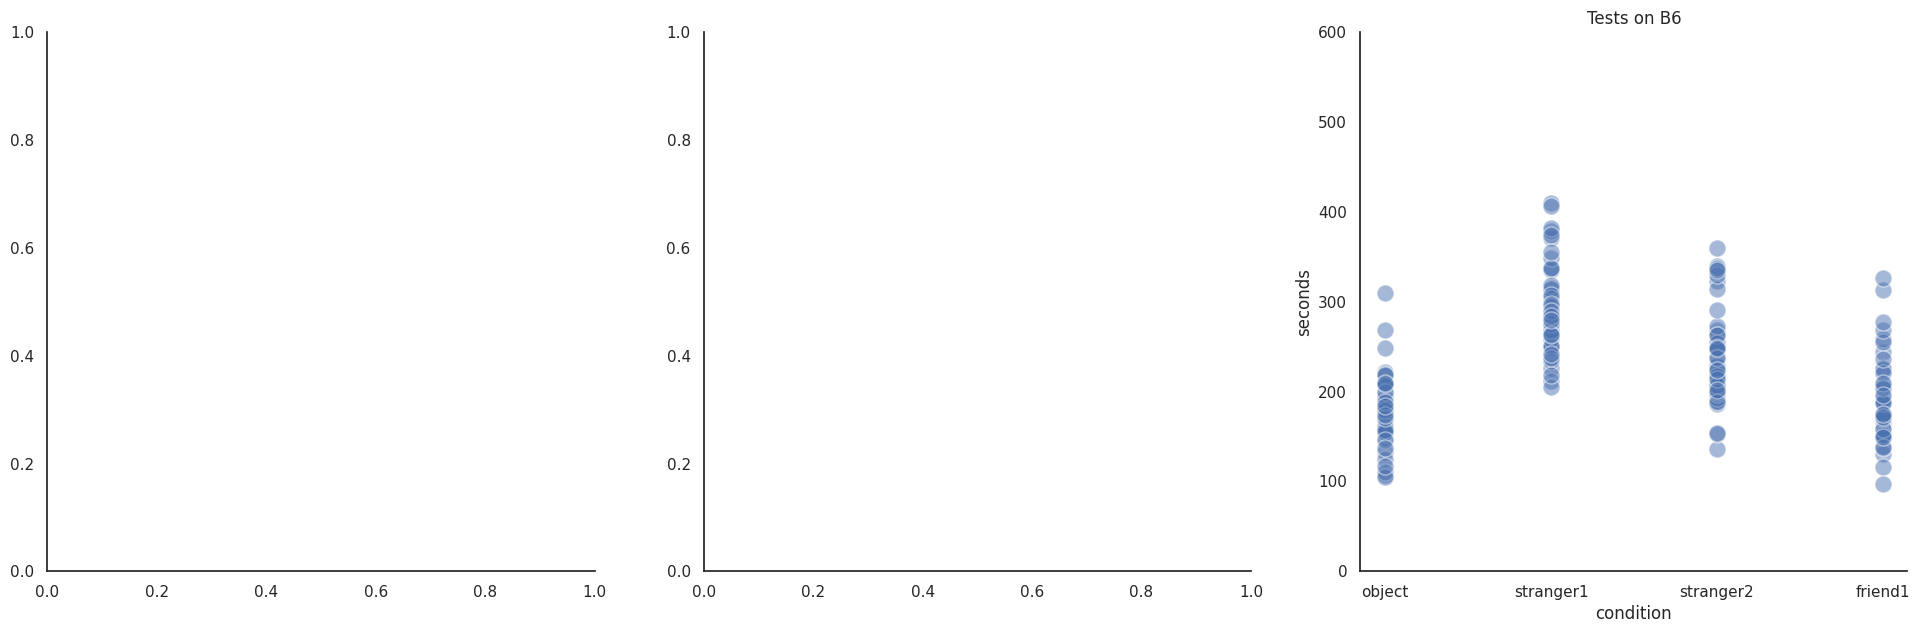

In [91]:
# Making plot for all

fig, axs = plt.subplots(1, 3, figsize=(24, 7))

b6_plot = sns.scatterplot(x = "condition", y = "seconds", data = df_b6, alpha = 0.5, s=150, , ax = axs[0])
b6_plot.set_title("Tests on B6")
plt.ylim(bottom = 0)
plt.ylim(top = 600)